In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
# Data Set Perapration
np.random.seed(50)

Exam1 = np.random.randint(0, 101, 100)
Exam2 = np.random.randint(0, 101, 100)
admission = np.random.randint(0, 2, 100)

data = pd.DataFrame({'Exam1': Exam1, 'Exam2': Exam2, 'admission': admission})


In [6]:
data

,Exam1,Exam2,admission
0,48,35,0
1,96,27,0
2,11,50,1
3,33,58,1
4,94,28,1
...,...,...,...
95,37,100,1
96,30,54,1
97,62,71,1
98,44,77,0


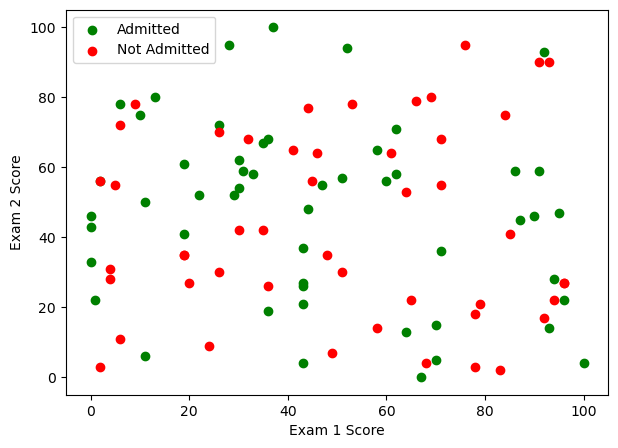

In [17]:
plt.figure(figsize=(7,5))

plt.scatter(data[data.admission==1]['Exam1'], data[data.admission==1]['Exam2'], color='green', label='Admitted')
plt.scatter(data[data.admission==0]['Exam1'], data[data.admission==0]['Exam2'],  color='red', label='Not Admitted')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.show()



In [ ]:
# Correlation -> Correlation tells us how strongly two variables are related to each other.
# Its value is between -1 and +1:
# +1 → Strong positive relation (when Exam1 score goes up, Exam2 score also goes up).
# -1 → Strong negative relation (when Exam1 score goes up, Exam2 score goes down).
# 0 → No relation (Exam1 and Exam2 scores don’t affect each other).

print(data[['Exam1','Exam2']].corr())

          Exam1     Exam2
Exam1  1.000000 -0.090875
Exam2 -0.090875  1.000000


In [24]:
# -> Model Building

from sklearn.model_selection import train_test_split

x = data[['Exam1','Exam2']]
y = data['admission']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.35


In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2 8]
 [5 5]]


In [29]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.20      0.24        10
           1       0.38      0.50      0.43        10

    accuracy                           0.35        20
   macro avg       0.34      0.35      0.34        20
weighted avg       0.34      0.35      0.34        20



Text(0, 0.5, 'True Positive Rate')

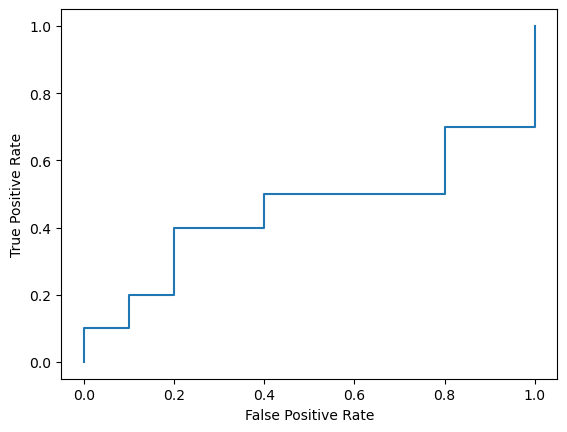

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)        
plt.plot(fpr, tpr, label='ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


